In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
## Example of multiple boolean indexing
# df2 = data[(data['epsilon'] == 0.1) & (data['chosenArms'] == 1.0)]
# df.index returns the row index

In [12]:
# Override the figure size
# plt.rcParams['figure.figsize'] = (6, 12)
def plot(name, input_file):
    df = pd.read_csv(input_file)
    nrows = 3
    ncols = 1
    width = 6 # in inches
    height = 12 # in inches
    f, (ax1, ax2, ax3) = plt.subplots(nrows, ncols, figsize=(width, height))

    # Plot the average rewards and cumulative rewards against epsilon
    epsilons = [0.1, 0.2, 0.3, 0.4, 0.5]
    for _, epsilon in enumerate(epsilons):
        df2 = df[df['epsilon'] == epsilon]
        X, y1, y2, y3 = [], [], [], []

        # Attempted the 
        for i in range(250):
            X.append(i)

            # Get the column with the index times
            df3 = df2[df2['times'] == i]
            cumulative_rewards = df3['cumulativeRewards'].mean()
            y1.append(df3['rewards'].mean())
            y2.append(cumulative_rewards)        
            y3.append(cumulative_rewards / float(i + 1) if cumulative_rewards > 0 else 0)

        # Plot the rewards for different epsilon values
        ax1.plot(X, y1, label = 'epsilon {}'.format(epsilon))

        # Plot the cumulative rewards for different epsilon values
        ax2.plot(X, y2, label = 'epsilon {}'.format(epsilon)) 

        # Plot the probability of getting the best arms for different epsilon values
        ax3.plot(X, y3, label = 'epsilon {}'.format(epsilon)) 


    # Plot the legends for both graphs
    ax1.set_xlabel('Iterations')
    ax1.set_ylabel('Average Rewards')
    ax1.set_title(name)
    ax1.legend()

    ax2.set_xlabel('Iterations')
    ax2.set_ylabel('Average Cumulative Rewards')
    ax2.set_title(name)
    ax2.legend()

    ax3.set_xlabel('Iterations')
    ax3.set_ylabel('Average Probability of Selecting Best Arm')
    ax3.set_title(name)
    ax3.legend()

FileNotFoundError: File b'../data/ ucb2.csv' does not exist

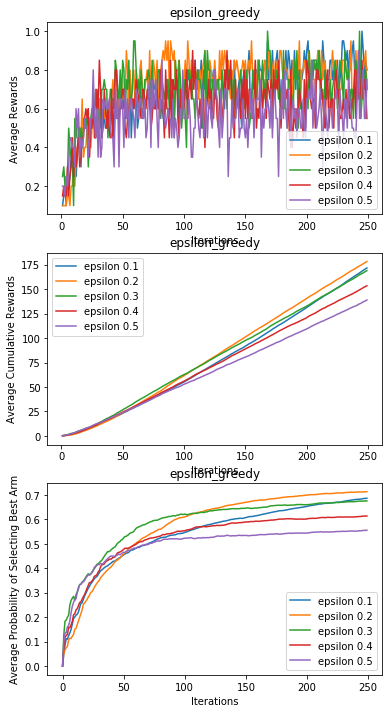

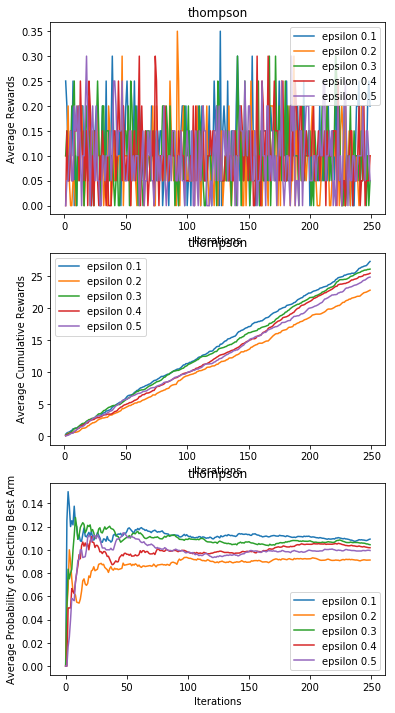

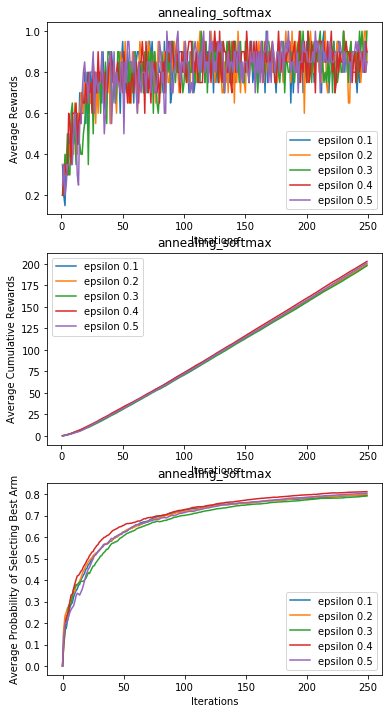

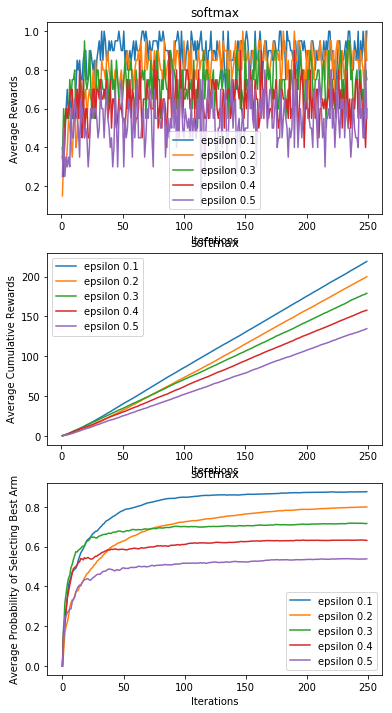

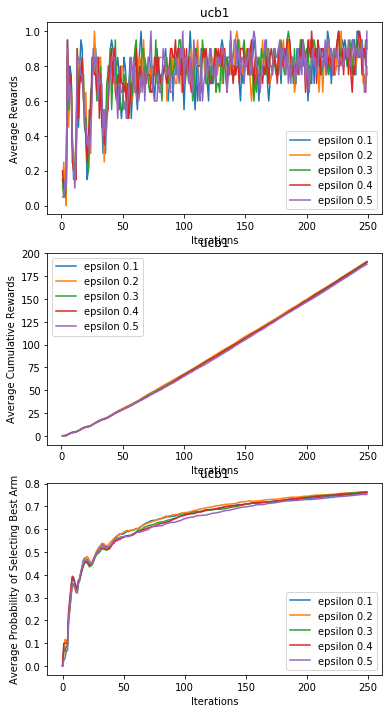

In [14]:
algorithms = ['epsilon_greedy', 'thompson', 'annealing_softmax', 'softmax', 'ucb1',' ucb2']

for algo in algorithms:
    plot(algo, '../data/{}.csv'.format(algo))